# Assignment A

In [2]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

from pandasql import PandaSQL
pdsql = PandaSQL()

## A1:Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column)

In [3]:
#read csv file of all practices in UK
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
cols= ['date','Practice_code','Practice_name','address_1','address_2','address_3','address_4','post_code',' ']
UK_prac = pd.read_csv(url,header=None,names=cols).rename(columns=lambda x: x.strip())

In [4]:
#select city
Leicester_prac=UK_prac[UK_prac['address_3']=='LEICESTER                ']
Leicester_prac


,date,Practice_code,Practice_name,address_1,address_2,address_3,address_4,post_code,
1023,201512,C82005,GROBY ROAD MEDICAL CENTRE (ID PATCHETT),9 GROBY ROAD,,LEICESTER,LEICESTERSHIRE,LE3 9ED,...
1032,201512,C82015,RUSHEY MEAD HEALTH CENTRE,RUSHEY MEAD HEALTH CENTRE,8 LOCKERBIE WALK,LEICESTER,LEICESTERSHIRE,LE4 7ZX,...
1035,201512,C82018,PARKER DRIVE SURGERY,122 PARKER DRIVE,,LEICESTER,,LE4 0JF,...
1037,201512,C82020,DE MONTFORT SURGERY,DE MONTFORT SURGERY,STUDENT HC 100 MILL LANE,LEICESTER,,LE2 7HX,...
1038,201512,C82021,THE CENTRAL SURGERY,THE CENTRAL SURGERY,BROOKSBY DRIVE OADBY,LEICESTER,LEICESTERSHIRE,LE2 5AA,...
1039,201512,C82022,THE BILLESDON SURGERY,BILLESDON SURGERY,4 MARKET PL BILLESDON,LEICESTER,LEICESTERSHIRE,LE7 9AJ,...
1040,201512,C82023,ST MATTHEWS HEALTH & COMMUNITY CENTRE,PRINCE PHILLIP HOUSE,MALABAR ROAD,LEICESTER,LEICESTERSHIRE,LE1 2NZ,...
1041,201512,C82024,SPINNEY HILL MEDICAL CENTRE,143 ST SAVIOURS ROAD,,LEICESTER,,LE5 3HX,...
1047,201512,C82030,DOWNING DRIVE SURGERY (AJJ BENTLEY),THE SURGERY,155 DOWNING DR EVINGTON,LEICESTER,,LE5 6LP,...
1048,201512,C82031,JOHNSON MEDICAL PRACTICE,56 MELBOURNE STREET,,LEICESTER,LEICESTERSHIRE,LE2 0AS,...


In [5]:
#read csv file of all prescription in UK(12.2015)
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
UK_presc = pd.read_csv(url,header=0).rename(columns=lambda x: x.strip())
UK_presc.rename(columns={'PRACTICE': 'Practice_code'}, inplace=True)

In [6]:
#connect prescription data with practice data through practice code
Leicester_presc=UK_presc.merge(Leicester_prac,how='inner',left_on='Practice_code', right_on='Practice_code')
Lei_presc_GP=Leicester_presc.groupby(['Practice_code','Practice_name'])['ACT COST'].agg({'frequency':'count','costs':'sum'})
Lei_presc_GP

,,frequency,costs
Practice_code,Practice_name,,
C82005,GROBY ROAD MEDICAL CENTRE (ID PATCHETT),1484,107735.06
C82015,RUSHEY MEAD HEALTH CENTRE,837,36467.88
C82018,PARKER DRIVE SURGERY,2071,208898.39
C82020,DE MONTFORT SURGERY,1241,60677.51
C82021,THE CENTRAL SURGERY,1602,122760.48
C82022,THE BILLESDON SURGERY,1287,101928.06
C82023,ST MATTHEWS HEALTH & COMMUNITY CENTRE,988,43640.62
C82024,SPINNEY HILL MEDICAL CENTRE,1974,225237.94
C82030,DOWNING DRIVE SURGERY (AJJ BENTLEY),1281,88445.23


## A2:Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

In [7]:
#most frequently prescribed medications
most_freq=Leicester_presc.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=False).head(10).reset_index()
most_freq

,BNF NAME,ITEMS,ACT COST
0,Paracet_Tab 500mg,15072,48389.27
1,Lansoprazole_Cap 15mg (E/C Gran),13834,17248.84
2,Amlodipine_Tab 5mg,13636,13471.93
3,Aspirin Disper_Tab 75mg,13087,11459.56
4,Metformin HCl_Tab 500mg,12683,50666.36
5,Simvastatin_Tab 40mg,10037,11741.40
6,Simvastatin_Tab 20mg,9376,9545.58
7,Bendroflumethiazide_Tab 2.5mg,8427,7940.50
8,Atorvastatin_Tab 20mg,8284,12851.11
9,Amlodipine_Tab 10mg,7907,8309.35


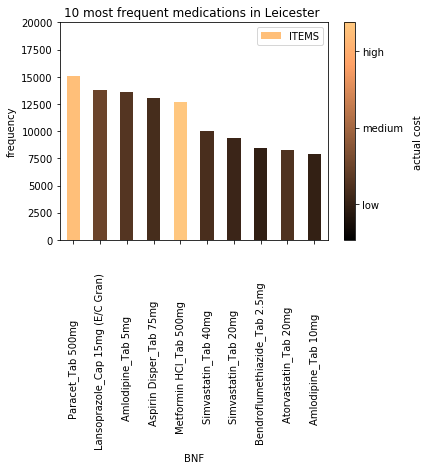

In [9]:
import matplotlib.cm as cm

#use color to represent actual cost
y=most_freq['ACT COST']
colors = cm.copper(y / float(max(y)))

ax1=most_freq [['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', title='10 most frequent medications in Leicester ',color=colors,figsize=(6,4),fontsize=10)
ax1.set_xlabel("BNF",fontsize=10)
ax1.set_ylabel("frequency",fontsize=10)
ax1.set_ylim(0,20000)

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([15000,30000,45000])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('actual cost', labelpad=10, y=0.45)


In [10]:
#least frequently prescribed medications
least_freq=Leicester_presc.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=True).head(10).reset_index()
least_freq

,BNF NAME,ITEMS,ACT COST
0,Isotrexin_Gel,1,6.92
1,Cystrin_Tab 5mg,1,6.89
2,Cystine500_Pdr Sach 4g,1,148.09
3,Peptamen_Liq Diet (Vanilla),1,56.14
4,Performa (Reagent)_Strips,1,9.21
5,Cymalon_Gran Sach 4g,1,5.17
6,Cyclopentolate HCl_Eye Dps 1% Ud,1,31.16
7,Pericyazine_Tab 10mg,1,37.87
8,Permitabs_Tab 400mg,1,16.19
9,Cutimed Gel 8g Wound Dress H/Gel Ster,1,1.56


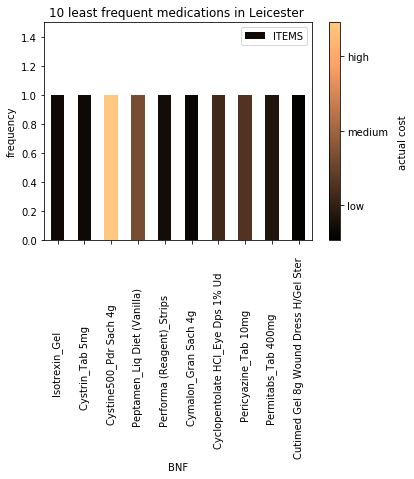

In [11]:
#use color to represent actual cost
y=least_freq['ACT COST']
colors = cm.copper(y / float(max(y)))

ax=least_freq [['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', title='10 least frequent medications in Leicester ',color=colors,figsize=(6,4),fontsize=10)
ax.set_xlabel("BNF",fontsize=10)
ax.set_ylabel("frequency",fontsize=10)
ax.set_ylim(0,1.5)

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([25,75,125])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('actual cost', labelpad=10, y=0.45)

In [32]:
# calculate total cost of Leicester and average cost of each GP
entire_city=Leicester_presc['ACT COST'].sum()
each_prac=format(entire_city/len(Leicester_prac),'0.2f')

# calculate total cost of ten most/least frequently prescribed medicines
total_most=most_freq['ACT COST'].sum()
total_least=least_freq['ACT COST'].sum()

# calculate the pecentage of ten most/least frequently prescribed medicines' cost in Leicester
percent_most=format(total_most/ entire_city,'0.3%')
percent_least=format(total_least/ entire_city,'0.3%')

Total cost of Leicester is 4919188.88 £ , and the average cost of each GP is 58561.77 £
Total cost of 10 most frequntly prescriped medicacines across all practices is 191623.9 £ , occupied 3.895% of the entire cost of Leceister.
Total cost of 10 least frequntly prescriped medicacines across all practices is 319.2 £ , occupied 0.006% of the entire cost of Leceister.


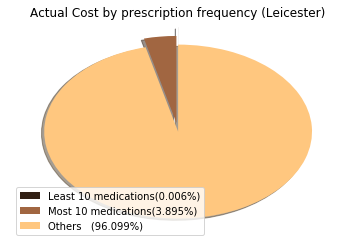

In [39]:
# show the result above in  pie chart
labels = [ 'Least 10 medications(0.006%)','Most 10 medications(3.895%)','Others   (96.099%)']
fracs = [total_least,total_most,  entire_city-total_most-total_least ]
explode=(0.2,0.1,0)
colors = cm.copper([40,130,330])
patches, texts =plt.pie(fracs, explode=explode, shadow=True, startangle=90,colors=colors)
plt.legend(patches, labels, loc="lower left")
plt.title('Actual Cost by prescription frequency (Leicester)',fontsize=12)

# show the result above in  text
print'Total cost of Leicester is', entire_city, '£',', and the average cost of each GP is' ,each_prac, '£'
print'Total cost of 10 most frequntly prescriped medicacines across all practices is',total_most, '£',", occupied" ,percent_most,'of the entire cost of Leceister.'
print'Total cost of 10 least frequntly prescriped medicacines across all practices is',total_least, '£', ", occupied" ,percent_least,'of the entire cost of Leceister.'

## A3:Find the top ten most expencive medications and calculate their total actual cost.

In [36]:
# calculate cost per drug: devide actual total cost by quantity
Leicester_presc['costs_per_drug']=Leicester_presc['ACT COST']/Leicester_presc['QUANTITY']

# sort medications by cosrt per drug, find ten most expensive medications
Leicester_sorted=Leicester_presc.groupby(['BNF CODE','BNF NAME']).agg({'costs_per_drug':'max','ACT COST':'sum'}).sort_values('costs_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
Leicester_top10 = Leicester_sorted.head(10).reset_index()
Leicester_top10


,BNF CODE,BNF NAME,costs_per_drug,ACT COST
0,0803043P0BBAGAD,Somatuline Autogel_Inj 120mg/0.5ml SSPfs,866.410,1732.82
1,0803043P0BBAEAE,Somatuline Autogel_Inj 60mg/0.5ml SS Pfs,509.490,1018.98
2,0803042S0BCAAAB,Decapeptyl SR_Inj 22.5mg Vl + Dil,382.830,382.83
3,0402020ABAAADAD,Paliperidone_Inj 150mg/1.5ml Pfs,363.020,1089.06
4,0606020Z0AAABAB,Denosumab_Inj 70mg/ml 1.7ml Vl,348.515,11907.74
5,0402020ABAAACAC,Paliperidone_Inj 100mg/1ml Pfs,290.420,2323.36
6,0803041AAAAAAAA,Fulvestrant_Inj 250mg/5ml Pfs,241.640,2173.88
7,0803041AABBAAAA,Faslodex_Inj 250mg/5ml Pfs,241.530,483.06
8,0402020ABAAABAB,Paliperidone_Inj 75mg/0.75ml Pfs,226.460,905.84
9,0803042K0BBABAB,Zoladex LA_Implant 10.8mg SafeSystem Pfs,217.305,4780.58


In [35]:
print 'The total actual cost of the 10 most expensive medications in Leicester is ',Leicester_top10['ACT COST'].sum()

The total actual cost of the 10 most expensive medications in Leicester is  26798.15


a=Leicester_presc[Leicester_presc['BNF NAME']=='3m Health Care_Cavilon Durable Barrier C']
b=pd.DataFrame()
b['costs_per_drug']=a['costs_per_drug']
b['BNF NAME']=a['BNF NAME']
b

Leicester_presc.groupby(['BNF NAME'])['NIC'].count()

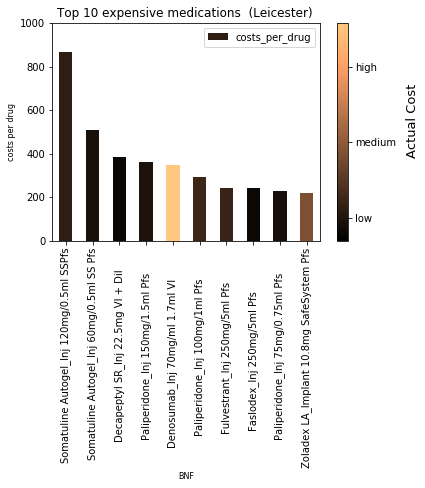

In [41]:
#compare ten most expensive medications on cost per drug and total actual cost 

%matplotlib inline

y=Leicester_top10['ACT COST']
colors = cm.copper(y / float(max(y)))

ax=Leicester_top10 [['BNF NAME','costs_per_drug']].plot(kind='bar', x='BNF NAME', y='costs_per_drug',color=colors, title='Top 10 expensive medications  (Leicester) ', figsize=(6,4),legend=True, fontsize=10)
ax.set_xlabel("BNF",fontsize=8)
ax.set_ylabel("costs per drug",fontsize=8)
ax.set_ylim(0,1000)

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([1600,5600,9600])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('Actual Cost', labelpad=10, y=0.55,fontsize=13)


## A4:How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [43]:
#use postcode to select practice in Cambridge 
Cambridge_prac=UK_prac[UK_prac['address_3']=='CAMBRIDGE                ']

#connect prescription data with practice data through practice code
Cambridge_presc=UK_presc.merge(Cambridge_prac,how='inner',left_on='Practice_code', right_on='Practice_code')
Cam_presc_GP=Cambridge_presc.groupby(['Practice_code','Practice_name'])['ACT COST'].agg({'frequency':'count','costs':'sum'})


In [44]:
#compare Leicester with Cambridge on prescription frequency and actual cost
print 'The prescribing frequency of cambridge is',Cambridge_presc['ITEMS'].sum() , 'and the frequency of Leicester is', Leicester_presc['ITEMS'].sum()
print 'Leicester had',round(float(Leicester_presc['ITEMS'].sum())/Cambridge_presc['ITEMS'].sum(),2), 'times more prescription than Cambridge'
print 'the prescribing cost of cambridge is', Cambridge_presc['ACT COST'].sum() , 'and the cost of Leicester is', Leicester_presc['ACT COST'].sum()
print 'Leicester spent', round(Leicester_presc['ACT COST'].sum()/Cambridge_presc['ACT COST'].sum(),2), 'times more money than Cambridge'

The prescribing frequency of cambridge is 345193 and the frequency of Leicester is 678589
Leicester had 1.97 times more prescription than Cambridge
the prescribing cost of cambridge is 2607317.49 and the cost of Leicester is 4919188.88
Leicester spent 1.89 times more money than Cambridge


Text(0.5,0,u'Frequency (per GP)')

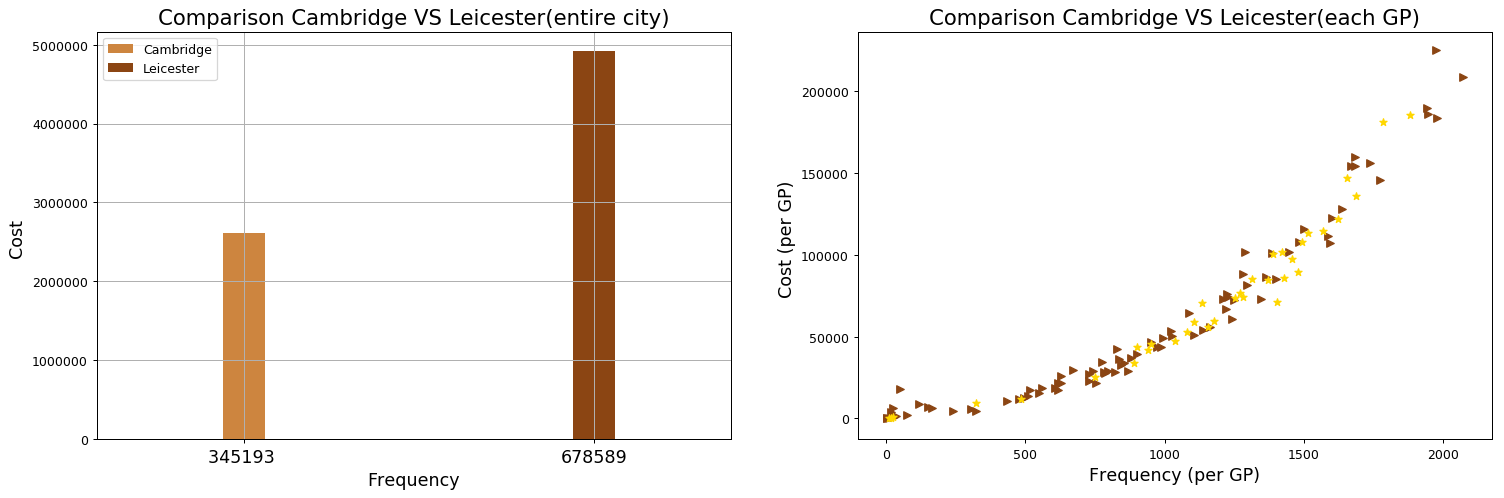

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20, 6),dpi=90)
x=[Cambridge_presc['ITEMS'].sum(),Leicester_presc['ITEMS'].sum()]
y=[Cambridge_presc['ACT COST'].sum(),Leicester_presc['ACT COST'].sum()]

plt.subplot(1, 2, 1)
patches=plt.bar(x,y,width=40000,color=["peru","saddlebrown"])
plt.xlim(205193,808589)
plt.xticks(x,['345193 ','678589'],fontsize=14)
plt.ylabel("Cost ",fontsize=14)
plt.xlabel("Frequency",fontsize=14)
plt.title('Comparison Cambridge VS Leicester(entire city)',fontsize=17)
lable=['Cambridge', 'Leicester']
plt.legend(patches,lable,loc="upper left")
plt.grid() 

plt.subplot(1, 2, 2)
plt.title('Comparison Cambridge VS Leicester(each GP)',fontsize=17)
plt.scatter(Lei_presc_GP['frequency'],Lei_presc_GP['costs'],c='saddlebrown',marker='>')
plt.scatter(Cam_presc_GP['frequency'],Cam_presc_GP['costs'],c='gold',marker='*')
plt.ylabel("Cost (per GP) ",fontsize=14)
plt.xlabel("Frequency (per GP)",fontsize=14)

#### The frequency and costs on GP level don't have big differencr between Cambridge and Leicester, so the reason whty Leicester spent twice more money in GP may mainly because it had more prescription. 

## A5:Using SQL, produce a table that provides the number of GP practices your city, ordered in descending order 

In [46]:
# calculate the number og GP in Leicester
UK_prac=UK_prac.drop(UK_prac.columns[-1],axis=1)
query="SELECT count(*) FROM UK_prac  WHERE UK_prac.address_3 = 'LEICESTER                '  "
print (pdsql(query, locals()))

   count(*)
0        84


# Assignment B

## B1:Calculate the monthly total spending for each GP-practice.

In [47]:
#count the number of prescription and monthly total spending in each GP
GP_cost=UK_presc.groupby(['Practice_code'])['ACT COST'].agg({'cost_per_practice':'sum'}).reset_index()
GP_cost.head()

,Practice_code,cost_per_practice
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51


## B2:Use the number of registered patients in each GP-practice to calculate the relative costs per patient. 

In [49]:
#patient in each GP from 01.10-31.12 
url='https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
patient_num=pd.read_csv(url).rename(columns=lambda x: x.strip())

In [62]:
GP_cost_with_patient_num = pd.merge(GP_cost, patient_num[['GP_PRACTICE_CODE', 'Total_All']], left_on='Practice_code' , right_on='GP_PRACTICE_CODE')
GP_cost_with_patient_num['cost_per_patient']=GP_cost_with_patient_num['cost_per_practice']/GP_cost_with_patient_num['Total_All']
GP_cost_with_patient_num=GP_cost_with_patient_num.drop('GP_PRACTICE_CODE',axis=1)
GP_cost_with_patient_num.rename(columns={'Total_All': 'patient_num'}, inplace=True)
GP_cost_with_patient_num

,Practice_code,cost_per_practice,patient_num,cost_per_patient
0,A81001,83220.57,4234,19.655307
1,A81002,333514.67,19691,16.937417
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443
5,A81006,197436.78,12345,15.993259
6,A81007,141780.85,9744,14.550580
7,A81008,62463.90,4027,15.511274
8,A81009,139612.91,9175,15.216666
9,A81011,188196.12,11435,16.457903


## B3.Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot 

Text(0,0.5,u'GP cost')

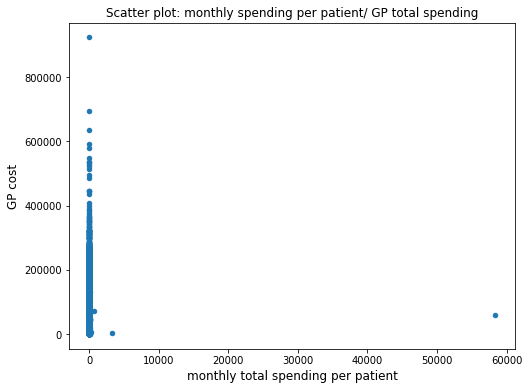

In [58]:
ax=GP_cost_with_patient_num.plot(kind='scatter', x='cost_per_patient', y='cost_per_practice', title='Scatter plot: monthly spending per patient/ GP total spending', figsize=(8,6))
ax.set_xlabel("monthly total spending per patient",fontsize=12)
ax.set_ylabel("GP cost",fontsize=12)

In [59]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [63]:
Lei_cost_with_patient_num=GP_cost_with_patient_num.merge(Leicester_prac,how='inner',left_on='Practice_code', right_on='Practice_code')
Lei_cost_with_patient_num=Lei_cost_with_patient_num[['Practice_code','cost_per_patient','cost_per_practice','patient_num']]
print Lei_cost_with_patient_num.head()

  Practice_code  cost_per_patient  cost_per_practice  patient_num
0        C82005         11.876867          107735.06         9071
1        C82015         15.445947           36467.88         2361
2        C82018         13.340468          208898.39        15659
3        C82020          3.289645           60677.51        18445
4        C82021         14.066745          122760.48         8727


In [65]:
drop_outlier=GP_cost_with_patient_num[~is_outlier(GP_cost_with_patient_num['cost_per_patient'])]
drop_outlier=drop_outlier[~is_outlier(drop_outlier['cost_per_practice'])]
drop_outlier=drop_outlier[~is_outlier(drop_outlier['patient_num'])]

In [66]:
drop_outlier

,Practice_code,cost_per_practice,patient_num,cost_per_patient
0,A81001,83220.57,4234,19.655307
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443
5,A81006,197436.78,12345,15.993259
6,A81007,141780.85,9744,14.550580
7,A81008,62463.90,4027,15.511274
8,A81009,139612.91,9175,15.216666
9,A81011,188196.12,11435,16.457903
10,A81012,67075.08,4749,14.124043


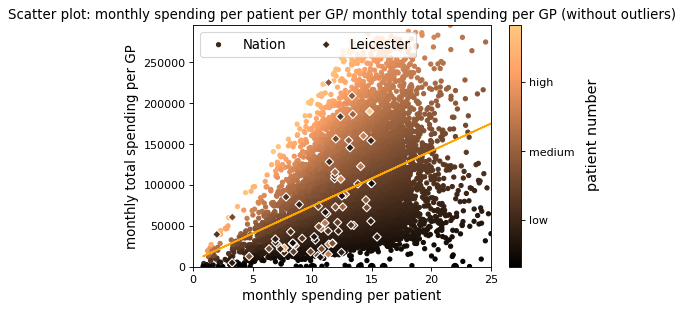

In [68]:
fig,ax=plt.subplots(dpi=80)
from math import floor

x=drop_outlier['cost_per_patient']
y=drop_outlier['cost_per_practice']
z=drop_outlier['patient_num']
colors = cm.copper(z / float(max(z)))
colors2 = cm.autumn(z / float(max(z)))

nation=ax.scatter(x, y, color=colors,s=14)
lei=ax.scatter(Lei_cost_with_patient_num['cost_per_patient'],Lei_cost_with_patient_num['cost_per_practice'],s=28, marker='D',facecolor=colors,edgecolors='white')

# color bar
bar = plt.scatter(z, z, c = z, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([4059,10000,16000])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('patient number', labelpad=10, y=0.55,fontsize=13)
# trend line
fit= np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='orange')

ax.set_title('Scatter plot: monthly spending per patient per GP/ monthly total spending per GP (without outliers)')
ax.set_xlabel("monthly spending per patient",fontsize=12)
ax.set_ylabel("monthly total spending per GP",fontsize=12)
max_x = floor(drop_outlier.cost_per_patient.max())
max_y = floor(drop_outlier.cost_per_practice.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)
ax.legend((nation,lei),('Nation','Leicester'),scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=12)


## B4:Visualize the relative costs per patient of all national GP-practices in a histogram

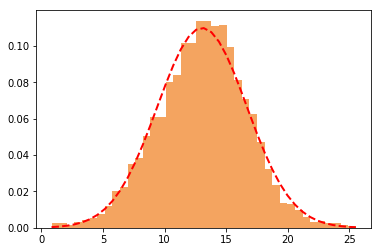

In [71]:
#use histogram to show relative costs per patient of all national GP-practices
from scipy.stats import norm
import matplotlib.mlab as mlab
# best fit of data
(mu, sigma) = norm.fit(drop_outlier['cost_per_patient'])
n, bins, patches =plt.hist(drop_outlier['cost_per_patient'],bins=40, normed=1,color='sandybrown')
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

## B5:Use descriptive statistics to show how your assigned city compares to the national level.

In [72]:
print GP_cost_with_patient_num.describe()
print Lei_cost_with_patient_num.describe()

       cost_per_practice   patient_num  cost_per_patient
count        7701.000000   7701.000000       7701.000000
mean        97573.645499   7471.459031         21.317316
std         65787.154710   4607.808820        665.570655
min             2.410000      1.000000          0.001872
25%         47714.240000   4037.000000         10.689451
50%         84448.530000   6646.000000         13.212266
75%        133552.730000  10000.000000         15.504289
max        923786.260000  60352.000000      58319.780000
       cost_per_patient  cost_per_practice   patient_num
count         69.000000          69.000000     69.000000
mean          10.827507       70182.166522   6393.898551
std            2.997146       54396.493421   4580.190479
min            1.986421        4825.590000   1089.000000
25%            8.576370       28365.380000   3190.000000
50%           11.369911       51011.780000   4832.000000
75%           12.779256      101799.330000   8727.000000
max           15.445947      22

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


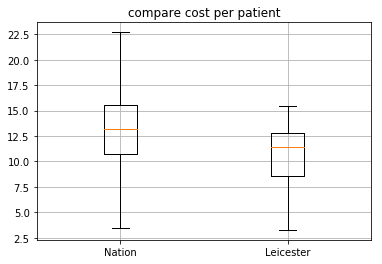

In [74]:
plt.boxplot([GP_cost_with_patient_num['cost_per_patient'],Lei_cost_with_patient_num['cost_per_patient']],0,'',positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Nation', 'Leicester'] )
plt.title('compare cost per patient')
plt.grid()          

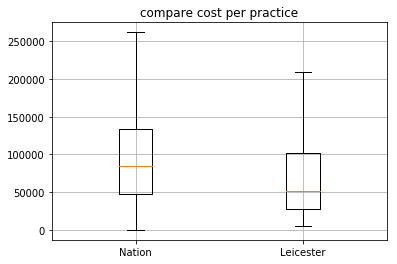

In [75]:
plt.boxplot([GP_cost_with_patient_num['cost_per_practice'],Lei_cost_with_patient_num['cost_per_practice']],0,'',positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Nation', 'Leicester'] )
plt.title('compare cost per practice')
plt.grid()          

# Assignment C

## C1:Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [77]:
#find all prescriptiona statin prescription in nation

filt_statin=UK_presc['BNF NAME'].str.contains('statin')
statin=UK_presc[filt_statin]



In [89]:
#calculate total cost on stastin in each GP 
GP_statin=statin.groupby(['Practice_code'])['ACT COST'].agg({'statin_cost':'sum'}).reset_index()
GP_statin

,Practice_code,statin_cost
0,A81001,1816.80
1,A81002,6530.36
2,A81003,868.39
3,A81004,2139.41
4,A81005,1891.93
5,A81006,5022.25
6,A81007,2252.79
7,A81008,1398.07
8,A81009,1614.59
9,A81011,2953.01


In [90]:
#connect cost per GP with patient number
GP_statin_with_patient_num = pd.merge(GP_statin, patient_num[['GP_PRACTICE_CODE', 'Total_All']] ,left_on='Practice_code' , right_on='GP_PRACTICE_CODE')

#calculate avarege cost on stastin per patient per GP
GP_statin_with_patient_num['relative costs per patient']=pd.Series(GP_statin_with_patient_num['statin_cost']/GP_statin_with_patient_num['Total_All'],index=GP_statin_with_patient_num.index)
print GP_statin_with_patient_num[['Practice_code','relative costs per patient','statin_cost']]

     Practice_code  relative costs per patient  statin_cost
0           A81001                    0.429098      1816.80
1           A81002                    0.331642      6530.36
2           A81003                    0.258680       868.39
3           A81004                    0.233790      2139.41
4           A81005                    0.240001      1891.93
5           A81006                    0.406825      5022.25
6           A81007                    0.231198      2252.79
7           A81008                    0.347174      1398.07
8           A81009                    0.175977      1614.59
9           A81011                    0.258243      2953.01
10          A81012                    0.200044       950.01
11          A81013                    0.180993      1118.90
12          A81014                    0.352599      1347.28
13          A81015                    0.218124       667.46
14          A81016                    0.226076      2177.11
15          A81017                    0.

## C2.Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [83]:
##read csv file of all IMD in UK
IMD=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv')
IMD=IMD.drop_duplicates(subset=None, keep='first', inplace=False)

#create df about IMD in Leicester
Leicester_IMD=pd.merge(IMD,Leicester_prac[['post_code','Practice_code','Practice_name']],left_on='Postcode',right_on='post_code')
Leicester_IMD


,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score,post_code,Practice_code,Practice_name
0,LE3 9ED,Live,E01013681,Leicester 016A E01013681,5122.0,2.0,6031.0,2.0,0.239,9665.0,...,1.0,5212.0,2.0,0.334,4556.0,2.0,0.331,LE3 9ED,C82005,GROBY ROAD MEDICAL CENTRE (ID PATCHETT)
1,LE4 7ZX,Live,E01013739,Leicester 005B E01013739,5700.0,2.0,4734.0,2.0,0.266,3313.0,...,4.0,7893.0,3.0,0.276,3315.0,2.0,0.367,LE4 7ZX,C82015,RUSHEY MEAD HEALTH CENTRE
2,LE4 7ZX,Live,E01013739,Leicester 005B E01013739,5700.0,2.0,4734.0,2.0,0.266,3313.0,...,4.0,7893.0,3.0,0.276,3315.0,2.0,0.367,LE4 7ZX,C82680,THE PRACTICE-RUSHEY MEAD
3,LE4 0JF,Live,E01013606,Leicester 008A E01013606,13685.0,5.0,13138.0,5.0,0.143,13267.0,...,4.0,11216.0,4.0,0.218,16839.0,6.0,0.146,LE4 0JF,C82018,PARKER DRIVE SURGERY
4,LE2 9BU,Live,E01013674,Leicester 036B E01013674,1354.0,1.0,2114.0,1.0,0.337,1563.0,...,4.0,3621.0,2.0,0.376,3024.0,1.0,0.377,LE2 9BU,C82100,THE HEDGES MEDICAL CENTRE (SA BAILEY)
5,LE2 9BU,Live,E01013674,Leicester 036B E01013674,1354.0,1.0,2114.0,1.0,0.337,1563.0,...,4.0,3621.0,2.0,0.376,3024.0,1.0,0.377,LE2 9BU,C82626,PASLEY ROAD HEALTH CENTRE (TK KHONG)
6,LE2 7HX,Live,E01032875,Leicester 040D E01032875,10054.0,4.0,29521.0,9.0,0.043,29014.0,...,1.0,20611.0,7.0,0.106,8384.0,3.0,0.250,LE2 7HX,C82020,DE MONTFORT SURGERY
7,LE2 5AA,Live,E01025977,Oadby and Wigston 003E E01025977,19586.0,6.0,19407.0,6.0,0.093,17327.0,...,6.0,26112.0,8.0,0.065,19515.0,6.0,0.123,LE2 5AA,C82021,THE CENTRAL SURGERY
8,LE7 9AJ,Live,E01025770,Harborough 002A E01025770,25256.0,8.0,29046.0,9.0,0.045,31377.0,...,4.0,29844.0,10.0,0.041,27804.0,9.0,0.070,LE7 9AJ,C82022,THE BILLESDON SURGERY
9,LE1 2NZ,Live,E01013755,Leicester 018F E01013755,1989.0,1.0,837.0,1.0,0.396,1955.0,...,2.0,4173.0,2.0,0.361,44.0,1.0,0.716,LE1 2NZ,C82023,ST MATTHEWS HEALTH & COMMUNITY CENTRE


## C3.Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.




In [91]:
#cut the cost on statin into deciles 
GP_statin_with_patient_num['decile']=pd.qcut(GP_statin_with_patient_num['relative costs per patient'].values,10)


In [92]:
#the first decile has the lowest relative cost on statin
first= GP_statin_with_patient_num[GP_statin_with_patient_num['decile']=='[0.000501, 0.125]']
first=first.reset_index()

# connect statin record with IMD record, through practice code and postcode
first_with_postcode=UK_prac.merge(first,how='inner',left_on='Practice_code',right_on='Practice_code')
first_IMD=first_with_postcode.merge(IMD,how='inner',left_on='post_code',right_on='Postcode')

In [100]:
#the last decile has the lowest relative cost on statin
last= GP_statin_with_patient_num[GP_statin_with_patient_num['decile']=='(0.362, 998.15]']
last=last.reset_index()

# connect statin record with IMD record, through practice code and postcode
last_with_postcode=UK_prac.merge(last,how='inner',left_on='Practice_code',right_on='Practice_code')
last_IMD=last_with_postcode.merge(IMD,how='inner',left_on='post_code',right_on='Postcode')


0         73.0
1         73.0
2        551.0
3      15355.0
4        788.0
5       1428.0
6      18333.0
7       3099.0
8      20422.0
9      26437.0
10      1558.0
11     23730.0
12      1009.0
13      8001.0
14      7586.0
15     19829.0
16      8675.0
17      9871.0
18       986.0
19      3850.0
20       744.0
21     20566.0
22     10916.0
23      9015.0
24     24416.0
25     15637.0
26     20800.0
27     12707.0
28     26130.0
29     29881.0
        ...   
738    14332.0
739    12282.0
740       66.0
741    27321.0
742    27074.0
743     1273.0
744    27602.0
745    23922.0
746    10916.0
747    23724.0
748     6268.0
749    10483.0
750    11750.0
751    25078.0
752    15388.0
753     9545.0
754     9072.0
755    17125.0
756      853.0
757     2241.0
758    14944.0
759     2183.0
760     4386.0
761    11511.0
762    27954.0
763     9514.0
764    22726.0
765      644.0
766    18864.0
767    13254.0
Name: Index of Multiple Deprivation Rank, dtype: float64

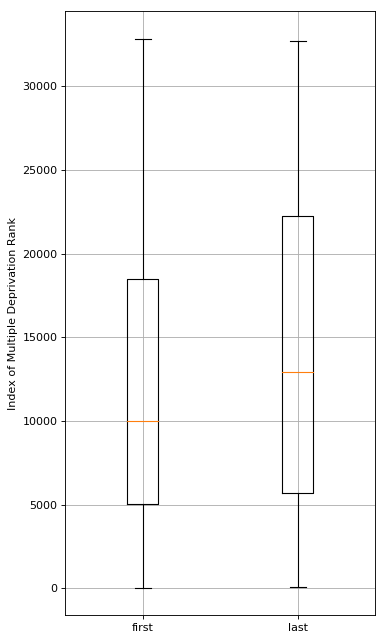

In [101]:
#use box plot to compare IMD rank in two group(the lowest and highest relatice cost group)
plt.figure(num=1, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([first_IMD['Index of Multiple Deprivation Rank'].dropna(),last_IMD['Index of Multiple Deprivation Rank']],positions = [1,2],widths = 0.2)
plt.xticks([1,2],['first', 'last'] )
plt.ylabel('Index of Multiple Deprivation Rank')
plt.grid()  

In [95]:
#description statistics of two groups
print 'First Decile' ,first_IMD['Index of Multiple Deprivation Rank'].describe()
print 'Last Decile' ,last_IMD['Index of Multiple Deprivation Rank'].describe()

First Decile count      768.000000
mean     12252.904948
std       8885.412977
min         27.000000
25%       5039.250000
50%       9965.000000
75%      18505.000000
max      32837.000000
Name: Index of Multiple Deprivation Rank, dtype: float64
Last Decile count      768.000000
mean     14040.671875
std       9315.217860
min         66.000000
25%       5664.750000
50%      12943.500000
75%      22254.000000
max      32701.000000
Name: Index of Multiple Deprivation Rank, dtype: float64


##  C4.Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [102]:
#read postcode files
postcodes=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv')
#filt postcode in England
Eng_postcode=postcodes[postcodes['Country Name']=='England']
#select the postcode reflect region
Eng_postcode_small=Eng_postcode[['Postcode 1','Region Name']]
Eng_postcode_small['Postcode_2']=Eng_postcode_small['Postcode 1'].str[:4]

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
#define a dict, whose keys are names of nine regions in England, values are postcode inside
import numpy as np
keys=Eng_postcode_small['Region Name'].unique()
dict_post={}
for i in keys:
    dict_post[i]= np.unique(Eng_postcode_small[Eng_postcode_small['Region Name']==i]['Postcode_2'].values).tolist()
print keys

# reverse the keys and values
post_reg={k: oldk for oldk, oldv in dict_post.items() for k in oldv}

['Yorkshire and The Humber' 'London' 'South East' 'South West'
 'East of England' 'East Midlands' 'North West' 'North East'
 'West Midlands']


In [104]:
#add region name to practices in England
UK_prac['Postcode_2']=UK_prac['post_code'].str[:4]
UK_prac['Region']=UK_prac['Postcode_2'].map(post_reg)
Eng_prac=UK_prac.dropna(axis=0, subset=['Region'])[['Practice_code','Practice_name','post_code','Region']]
Eng_prac.sort_values(by=['Region'])

,Practice_code,Practice_name,post_code,Region
1218,C83628,WOOLSTHORPE SURGERY,NG32 1LX,East Midlands
1012,C81647,ST LAWRENCE ROAD SURGERY,S42 5LH,East Midlands
1011,C81642,PARK VIEW MEDICAL CENTRE,NG10 3RJ,East Midlands
7053,C83649,MARKET CROSS SURGERY,NG33 4BB,East Midlands
1009,C81638,CASTLE STREET MEDICAL CENTRE,S44 6PP,East Midlands
1007,C81633,GRASSMOOR SURGERY,S42 5ED,East Midlands
8572,Y03160,SPALDING PRIMARY CARE CENTRE OOH,PE11 3DT,East Midlands
1006,C81629,CLARENCE ROAD SURGERY,DE23 8RJ,East Midlands
8565,Y03133,COAG & OHT CLINIC,NG8 1HJ,East Midlands
8563,Y03131,SUBSTANCE MISUSE OUT-REACH CLINICS,NG3 2FW,East Midlands


In [105]:
#read mortality data
Mortality=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')
Mortality_2015=Mortality[Mortality['Year']==2015] 
Mortality_2015=Mortality_2015[Mortality['Breakdown']=='Region']

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [106]:
#define a function that could convert number from str type to float type
def str_float(i):
    i=i.replace(',','')
    return float(i)

#apply the function on series that need change type
Mortality_2015['Numerator']=Mortality_2015['Numerator'].apply(str_float)
Mortality_2015['Denominator']=Mortality_2015['Denominator'].apply(str_float)

#calculate mortality rate (divide)
Mortality_2015['rate']=Mortality_2015['Numerator']/Mortality_2015['Denominator']

#ignore gender
Mortality_2015=Mortality_2015[Mortality_2015['Gender']=='Person']
print Mortality_2015[['Level description','rate']]


            Level description      rate
471             East Midlands  0.000739
472           East of England  0.000632
473                    London  0.000492
474                North East  0.000834
475                North West  0.000821
476                South East  0.000571
477                South West  0.000672
478             West Midlands  0.000717
479  Yorkshire and The Humber  0.000762


## Q5.Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [107]:
#create a df that contain info about total cost on statin and mortality rate of each region
Region=pd.DataFrame()
GP_cost_statin=GP_cost_statin.reset_index()


In [110]:
#select statin data in England throgh merge on England practice
Eng_statin=Eng_prac.merge(GP_cost_statin,how='inner',left_on='Practice_code',right_on='Practice_code')
Region['statin']=Eng_statin.groupby('Region')['statin_cost'].sum()
#combine rate with statin cost
Region=pd.merge(Region,Mortality_2015,left_index = True, right_on='Level description')
Region=Region.sort_values(by='statin')



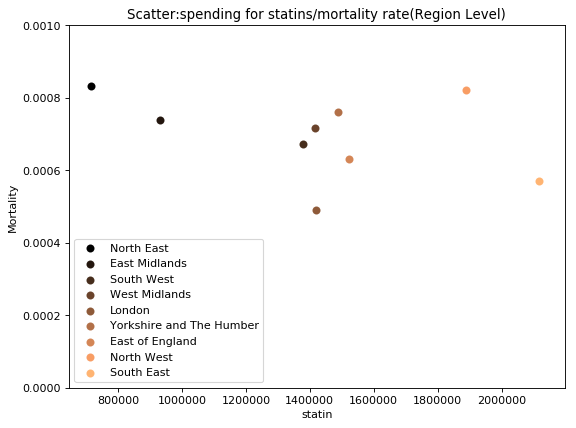

In [111]:
#use scatter plot to show the relation between mortality and statin cost
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
colormap = cm.copper
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(Region.index))]
for i,c in enumerate(colorlist):

    x = Region['statin'].tolist()[i]
    y = Region['rate'].tolist()[i]
    l = Region['Level description'].tolist()[i]
    plt.scatter(x, y, label=l, s=50, linewidth=0.1, c=c)
    
plt.title('Scatter:spending for statins/mortality rate(Region Level)')
plt.ylabel("Mortality")
plt.xlabel("statin")
plt.ylim(0, 0.001)
plt.legend(loc='best')
plt.show()

#change a color map

# Section D

## Q1.Provide a visualisation of the seasonal patterns across all years.

In [55]:
#import flu files
ArgentinaFlu=pd.read_csv('https://www.google.org/flutrends/about/data/flu/ar/data.txt',sep=',',header=8)
ArgentinaFlu['Date'] = pd.to_datetime(ArgentinaFlu['Date'])
NorwayFlu=pd.read_csv('https://www.google.org/flutrends/about/data/flu/no/data.txt',sep=',',header=8)
NorwayFlu['Date'] = pd.to_datetime(NorwayFlu['Date'])


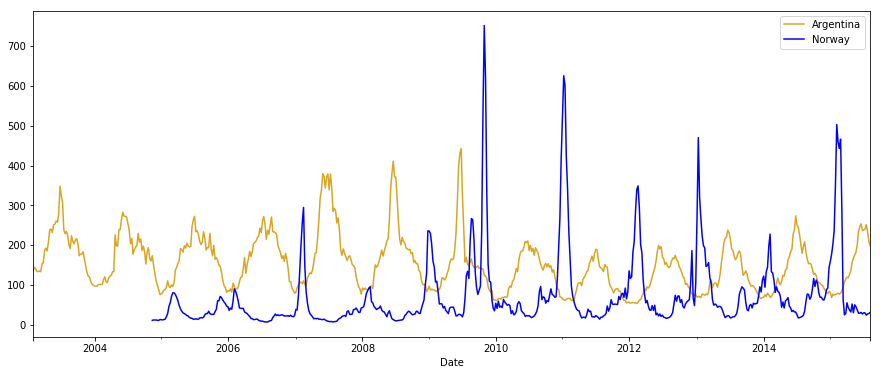

In [56]:
#Plot and store the flu trens for Argentina
ax = ArgentinaFlu.plot(legend ='left', x='Date', y = 'Argentina', figsize=(15, 6), grid=True,c='goldenrod')

#Plot the flu trend for Australia; ax=ax plots the chart into the previous
NorwayFlu.plot(x='Date', y = 'Norway' , ax=ax,c='blue')

## Q2.Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [57]:
#extract year from date
def Year(time):
    i=time.year
    return i

NorwayFlu['year']=NorwayFlu['Date'].apply(Year)
ArgentinaFlu['year']=ArgentinaFlu['Date'].apply(Year)

In [58]:
#find the yearly max and min 
Norway_yearly=NorwayFlu.groupby(['year'])['Norway'].agg(['max','min'])
Argentina_yearly=ArgentinaFlu.groupby(['year'])['Argentina'].agg(['max','min'])


In [ ]:
# add a picture here

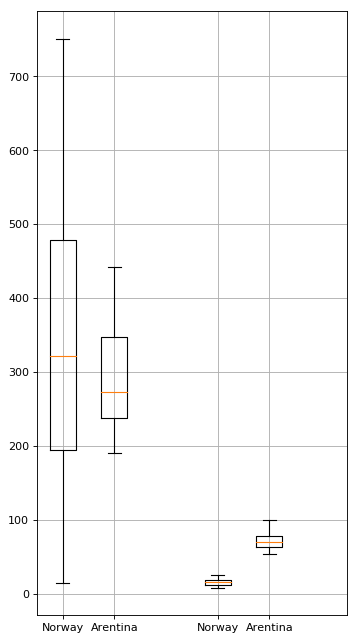

In [59]:
#compare yearly max and min in Norway and Argentina
plt.figure(num=1, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([Norway_yearly['max'],Argentina_yearly['max']],positions = [1,3],widths = 1)
plt.boxplot([Norway_yearly['min'],Argentina_yearly['min']],positions = [7,9],widths = 1)

plt.xticks([1,3,7,9],['Norway','Arentina','Norway','Arentina'])
plt.xlim(0,12)
plt.grid()  

In [60]:
#extract month from date
def Month(time):
    i=time.month
    return i

#avarage flu on each month across all the years
ArgentinaFlu['month']=ArgentinaFlu['Date'].apply(Month)
ArgentinaFlu['mean']=ArgentinaFlu.groupby(['month'])['Argentina'].mean()
ar_mean=[]
ar_mean=ArgentinaFlu.groupby(['month'])['Argentina'].mean().dropna()

NorwayFlu['month']=NorwayFlu['Date'].apply(Month)
NorwayFlu['mean']=NorwayFlu.groupby(['month'])['Norway'].mean()
no_mean=[]
no_mean=NorwayFlu.groupby(['month'])['Norway'].mean().dropna()

month=range(1,13)

        4       3         2
0.1999 x - 5.4 x + 43.92 x - 98.63 x + 141.3


Text(0.5,1,u'seasonly chage flu trend in Argentina')

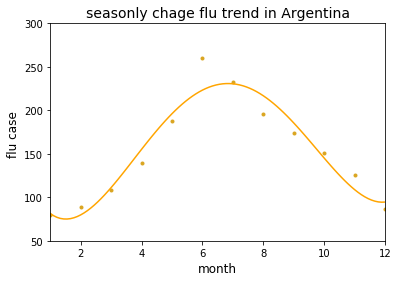

In [64]:
# mathematical function of month and flu
z=np.polyfit(month,ar_mean,4)
p = np.poly1d(z)
print np.poly1d(p)

# draw the point and the funtion
xp = np.linspace(1, 12, 100)
plt.xlim(1,12)
plt.ylim(50,300)
plt.plot(month, ar_mean, '.',color='goldenrod')
plt.plot(xp, p(xp), '-',color='orange')
plt.ylabel("flu case ",fontsize=12)
plt.xlabel("month",fontsize=12)
plt.title('seasonly chage flu trend in Argentina',fontsize=14)

         4         3         2
-0.1054 x + 2.403 x - 13.39 x - 12.89 x + 196.7


Text(0.5,1,u'seasonly chage flu trend in Norway')

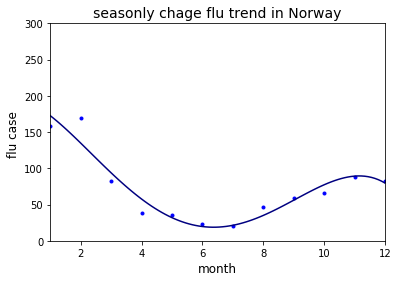

In [61]:

# mathematical function of month and flu
z2=np.polyfit(month,no_mean,4)
p2 = np.poly1d(z2)
print np.poly1d(p2)

# draw the point and the funtion
xp2 = np.linspace(1, 12, 100)
plt.xlim(1,12)
plt.ylim(0,300)
plt.plot(month, no_mean,'.' ,color='blue' )
plt.plot(xp2, p2(xp2), '-',color='navy')
plt.ylabel("flu case ",fontsize=12)
plt.xlabel("month",fontsize=12)
plt.title('seasonly chage flu trend in Norway',fontsize=14)

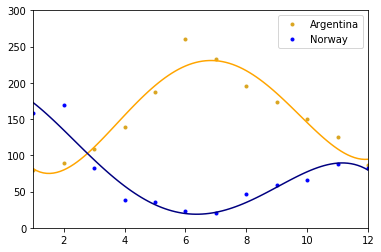

In [65]:
plt.xlim(1,12)
plt.ylim(0,300)
plt.plot(month, ar_mean, '.',color='goldenrod')
plt.plot(xp, p(xp), '-',color='orange')
plt.plot(month, no_mean,'.' ,color='blue' )
plt.plot(xp2, p2(xp2), '-',color='navy')
plt.legend()

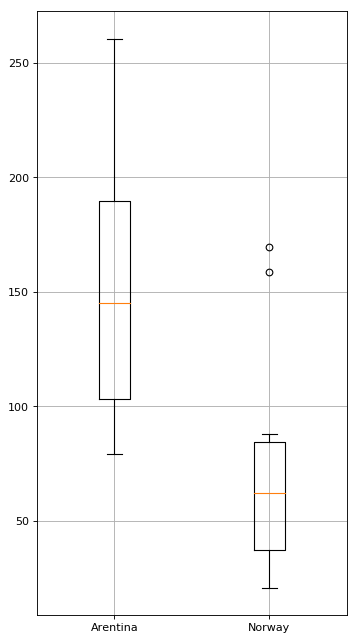

In [63]:
plt.figure(num=1, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([ar_mean,no_mean],positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Arentina', 'Norway'] )
plt.grid()  